<a href="https://colab.research.google.com/github/ivancostabernardo/Portfolio/blob/main/2023_12_Spotify_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Preparation

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import random

In [3]:
sns.set_theme()

In [9]:
wdir = '/content/drive/MyDrive/Pessoal/Data science/Projetos/2023-12 Spotify/'

## Introducing the data

In [10]:
df = pd.read_csv(wdir + 'spotify_songs.csv')
df.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [11]:
df.shape

(32833, 23)

In [12]:
df.columns

Index(['track_id', 'track_name', 'track_artist', 'track_popularity',
       'track_album_id', 'track_album_name', 'track_album_release_date',
       'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms'],
      dtype='object')

In [16]:
nas_by_column = df.isna().sum()
nas_by_column[nas_by_column > 0].sort_values(ascending=False)

track_name          5
track_artist        5
track_album_name    5
dtype: int64

# Descriptive analysis

## Categorical variables vs. popularity

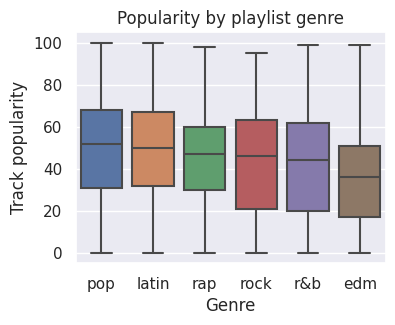

In [17]:
genre_order = df.groupby('playlist_genre')['track_popularity'].median().sort_values(ascending=False).index

fig, ax = plt.subplots(figsize=(4, 3))

sns.boxplot(data=df, x='playlist_genre', y='track_popularity', order=genre_order, fliersize=1, ax=ax)
ax.set_xlabel('Genre')
ax.set_ylabel('Track popularity')
ax.set_title('Popularity by playlist genre')

plt.show()

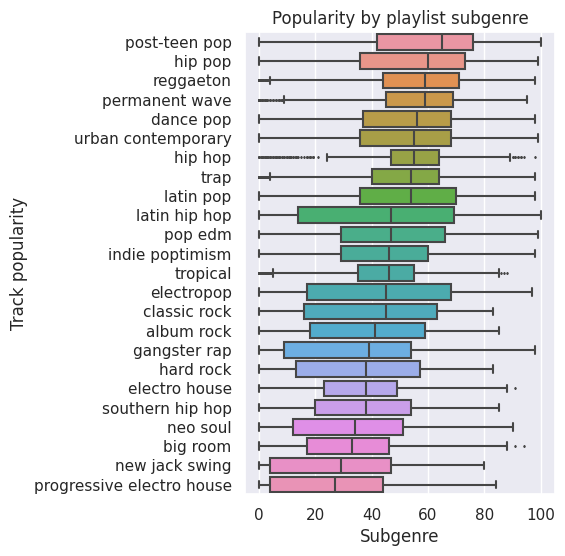

In [18]:
subgenre_order = df.groupby('playlist_subgenre')['track_popularity'].median().sort_values(ascending=False).index

fig, ax = plt.subplots(figsize=(4, 6))

sns.boxplot(data=df, x='track_popularity', y='playlist_subgenre', order=subgenre_order, fliersize=1, ax=ax)
ax.set_xlabel('Subgenre')
ax.set_ylabel('Track popularity')
ax.set_title('Popularity by playlist subgenre')

plt.show()

In [19]:
model_genre = ols('track_popularity ~ C(playlist_genre)', data=df).fit()
anova_table_genre = sm.stats.anova_lm(model_genre, typ=2)
anova_table_genre

,sum_sq,df,F,PR(>F)
C(playlist_genre),6.270131e+05,5.0,207.209051,2.702657e-218
Residual,1.986685e+07,32827.0,NaN,NaN


In [20]:
model_subgenre = ols('track_popularity ~ C(playlist_subgenre)', data=df).fit()
anova_table_subgenre = sm.stats.anova_lm(model_subgenre, typ=2)
anova_table_subgenre

,sum_sq,df,F,PR(>F)
C(playlist_subgenre),2.474062e+06,23.0,195.850965,0.0
Residual,1.801980e+07,32809.0,NaN,NaN


In [21]:
model_subgenre_pop = ols('track_popularity ~ C(playlist_subgenre)', data=df.query('playlist_genre == "pop"')).fit()
anova_table_subgenre_pop = sm.stats.anova_lm(model_subgenre_pop, typ=2)
anova_table_subgenre_pop

,sum_sq,df,F,PR(>F)
C(playlist_subgenre),1.993855e+05,3.0,111.316167,5.642884e-70
Residual,3.285591e+06,5503.0,NaN,NaN


In [22]:
model_subgenre_latin = ols('track_popularity ~ C(playlist_subgenre)', data=df.query('playlist_genre == "latin"')).fit()
anova_table_subgenre_latin = sm.stats.anova_lm(model_subgenre_latin, typ=2)
anova_table_subgenre_latin

,sum_sq,df,F,PR(>F)
C(playlist_subgenre),9.212837e+04,3.0,48.830501,4.125372e-31
Residual,3.239459e+06,5151.0,NaN,NaN


In [23]:
model_subgenre_rap = ols('track_popularity ~ C(playlist_subgenre)', data=df.query('playlist_genre == "rap"')).fit()
anova_table_subgenre_rap = sm.stats.anova_lm(model_subgenre_rap, typ=2)
anova_table_subgenre_rap

,sum_sq,df,F,PR(>F)
C(playlist_subgenre),3.841594e+05,3.0,268.811719,2.929826e-163
Residual,2.735302e+06,5742.0,NaN,NaN


In [24]:
model_subgenre_rock = ols('track_popularity ~ C(playlist_subgenre)', data=df.query('playlist_genre == "rock"')).fit()
anova_table_subgenre_rock = sm.stats.anova_lm(model_subgenre_rock, typ=2)
anova_table_subgenre_rock

,sum_sq,df,F,PR(>F)
C(playlist_subgenre),2.313517e+05,3.0,135.317176,2.946755e-84
Residual,2.819294e+06,4947.0,NaN,NaN


In [25]:
model_subgenre_r_and_b = ols('track_popularity ~ C(playlist_subgenre)', data=df.query('playlist_genre == "r&b"')).fit()
anova_table_subgenre_r_and_b = sm.stats.anova_lm(model_subgenre_r_and_b, typ=2)
anova_table_subgenre_r_and_b

,sum_sq,df,F,PR(>F)
C(playlist_subgenre),6.380278e+05,3.0,384.356039,2.245859e-226
Residual,3.002925e+06,5427.0,NaN,NaN


In [26]:
model_subgenre_edm = ols('track_popularity ~ C(playlist_subgenre)', data=df.query('playlist_genre == "edm"')).fit()
anova_table_subgenre_edm = sm.stats.anova_lm(model_subgenre_edm, typ=2)
anova_table_subgenre_edm

,sum_sq,df,F,PR(>F)
C(playlist_subgenre),3.019963e+05,3.0,206.969855,8.694263e-128
Residual,2.937232e+06,6039.0,NaN,NaN


Each subgenre belongs to an only genre.

In [27]:
df.groupby('playlist_subgenre')['playlist_genre'].nunique().max()

1

## Quantitative variables

In [28]:
corr_mat = df.corr(method='spearman')
corr_mat.sort_values('track_popularity', ascending=False)

<ipython-input-28-043e988b0da9>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mat = df.corr(method='spearman')


,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
track_popularity,1.000000,0.065250,-0.118494,-0.001367,0.065369,0.012607,0.006659,0.128775,-0.193198,-0.029923,0.037220,-0.022321,-0.120741
acousticness,0.128775,0.104375,-0.491177,0.007286,-0.283909,-0.009798,0.028619,1.000000,-0.213523,-0.057762,0.089142,-0.166675,-0.074565
loudness,0.065369,-0.022530,0.656131,-0.004232,1.000000,-0.018677,0.099850,-0.283909,-0.162442,0.083143,0.042032,0.112165,-0.133475
danceability,0.065250,1.000000,-0.141853,0.014381,-0.022530,-0.056551,0.260503,0.104375,-0.055700,-0.137864,0.330741,-0.167818,-0.091442
valence,0.037220,0.330741,0.122590,0.018439,0.042032,0.002363,0.077773,0.089142,-0.159671,-0.053898,1.000000,-0.062639,-0.004150
mode,0.012607,-0.056551,0.001411,-0.168570,-0.018677,1.000000,-0.087720,-0.009798,-0.013331,-0.009650,0.002363,0.011231,0.018230
speechiness,0.006659,0.260503,0.065109,0.028959,0.099850,-0.087720,1.000000,0.028619,-0.199441,0.057429,0.077773,0.026296,-0.124518
key,-0.001367,0.014381,0.008607,1.000000,-0.004232,-0.168570,0.028959,0.007286,0.011859,0.000421,0.018439,-0.015870,0.012992
tempo,-0.022321,-0.167818,0.177076,-0.015870,0.112165,0.011231,0.026296,-0.166675,0.071091,0.032863,-0.062639,1.000000,-0.016053
liveness,-0.029923,-0.137864,0.140314,0.000421,0.083143,-0.009650,0.057429,-0.057762,-0.029225,1.000000,-0.053898,0.032863,-0.040434


<Axes: >

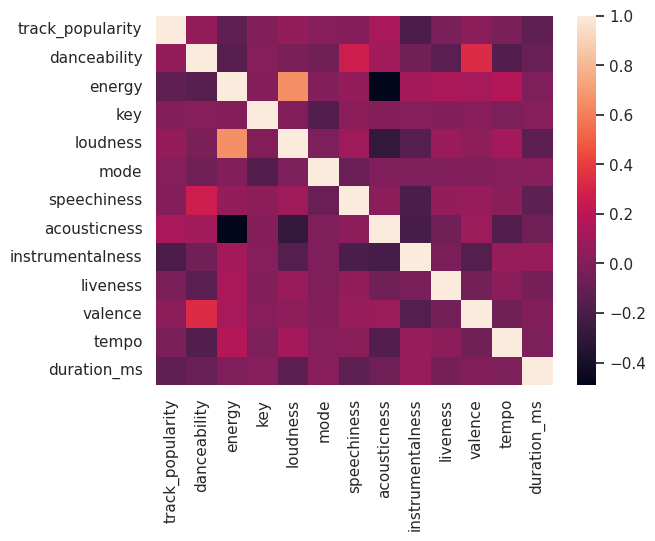

In [29]:
sns.heatmap(corr_mat)

We can see that energy and loudness are the most correlated features, whereas track popularity is very little correlated to all other variables.

In [30]:
df.describe()

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000
mean,42.477081,0.654850,0.698619,5.374471,-6.719499,0.565711,0.107068,0.175334,0.084747,0.190176,0.510561,120.881132,225799.811622
std,24.984074,0.145085,0.180910,3.611657,2.988436,0.495671,0.101314,0.219633,0.224230,0.154317,0.233146,26.903624,59834.006182
min,0.000000,0.000000,0.000175,0.000000,-46.448000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4000.000000
25%,24.000000,0.563000,0.581000,2.000000,-8.171000,0.000000,0.041000,0.015100,0.000000,0.092700,0.331000,99.960000,187819.000000
50%,45.000000,0.672000,0.721000,6.000000,-6.166000,1.000000,0.062500,0.080400,0.000016,0.127000,0.512000,121.984000,216000.000000
75%,62.000000,0.761000,0.840000,9.000000,-4.645000,1.000000,0.132000,0.255000,0.004830,0.248000,0.693000,133.918000,253585.000000
max,100.000000,0.983000,1.000000,11.000000,1.275000,1.000000,0.918000,0.994000,0.994000,0.996000,0.991000,239.440000,517810.000000


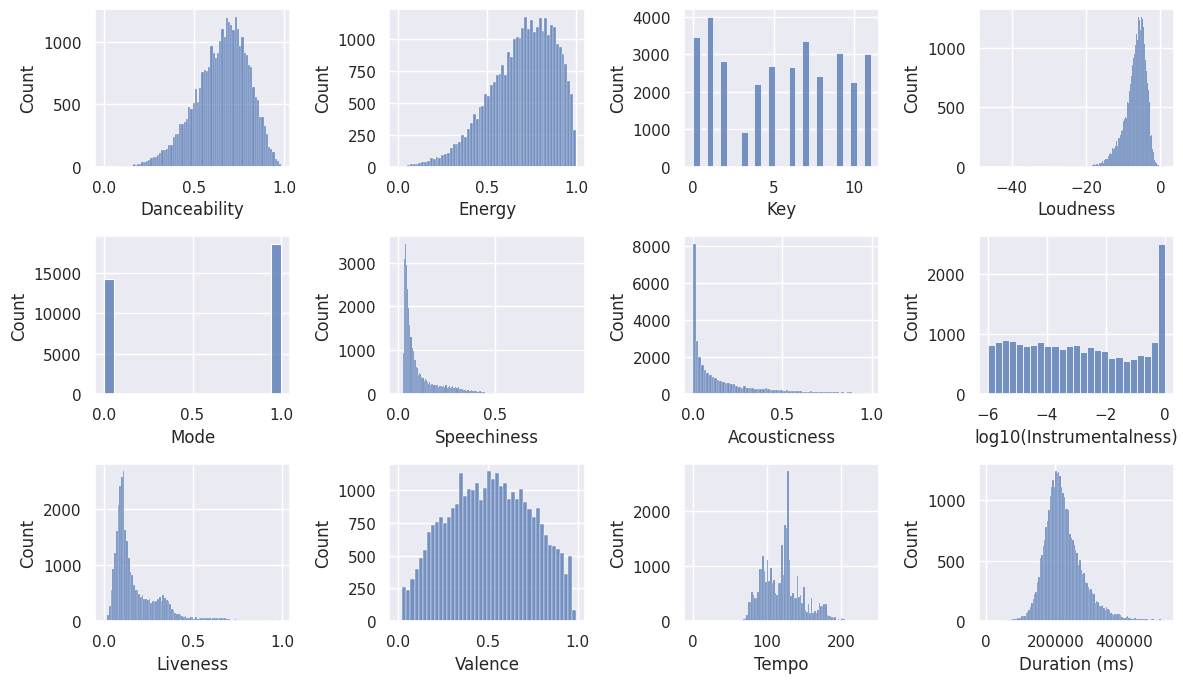

In [38]:
fig, ax = plt.subplots(ncols=4, nrows=3, figsize=(12, 7))

plot_features = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
                 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']

x_labels = ['Danceability', 'Energy', 'Key', 'Loudness', 'Mode', 'Speechiness', 'Acousticness',
            'log10(Instrumentalness)', 'Liveness', 'Valence', 'Tempo', 'Duration (ms)']

for row in range(3):
    for col in range(4):
        feature = plot_features[4 * row + col]
        if feature != 'instrumentalness':
            sns.histplot(data=df, x=feature, ax=ax[row, col])
        else:
            sns.histplot(x=np.log10(df.query('instrumentalness > 0')['instrumentalness']), ax=ax[row, col])
        ax[row, col].set(xlabel=x_labels[4 * row + col])

plt.tight_layout()
plt.show()

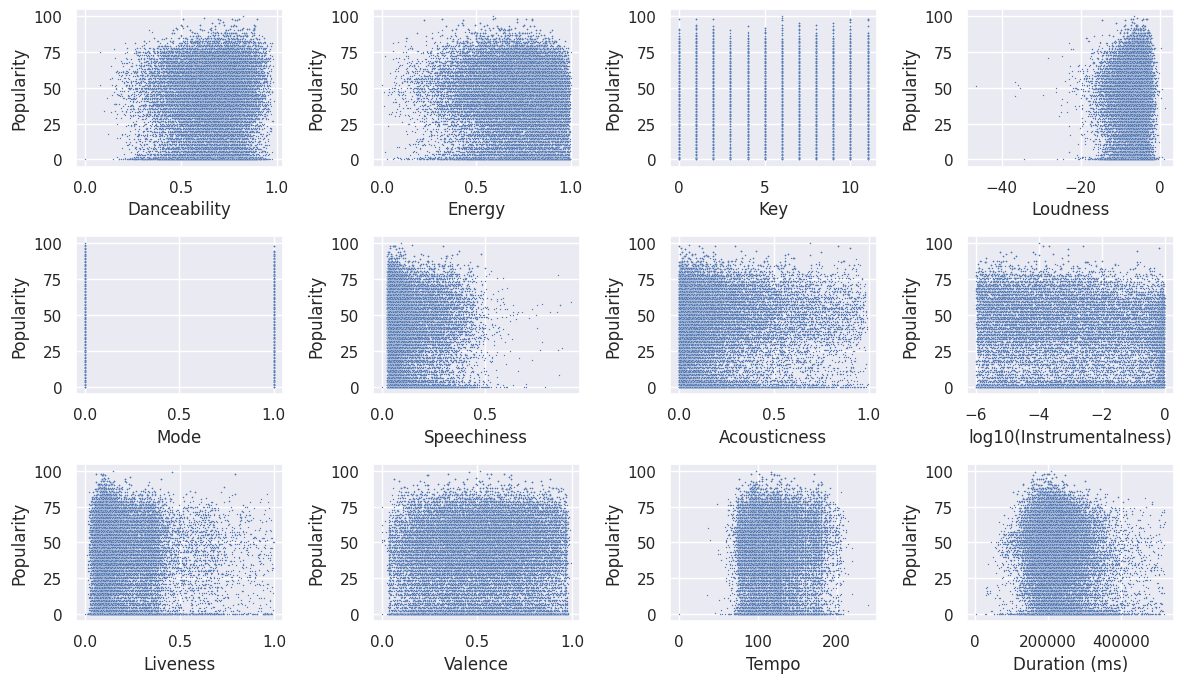

In [41]:
fig, ax = plt.subplots(ncols=4, nrows=3, figsize=(12, 7))

plot_features = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
                 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']

for row in range(3):
    for col in range(4):
        feature = plot_features[4 * row + col]
        if feature != 'instrumentalness':
            sns.scatterplot(data=df, x=plot_features[4 * row + col], y='track_popularity', s=1, ax=ax[row, col])
        else:
            sns.scatterplot(x=np.log10(df.query('instrumentalness > 0')['instrumentalness']),
                            y=df.query('instrumentalness > 0')['track_popularity'],
                            s=1, ax=ax[row, col])
        ax[row, col].set(xlabel=x_labels[4 * row + col], ylabel='Popularity')

plt.tight_layout()
plt.show()

KeyboardInterrupt: ignored

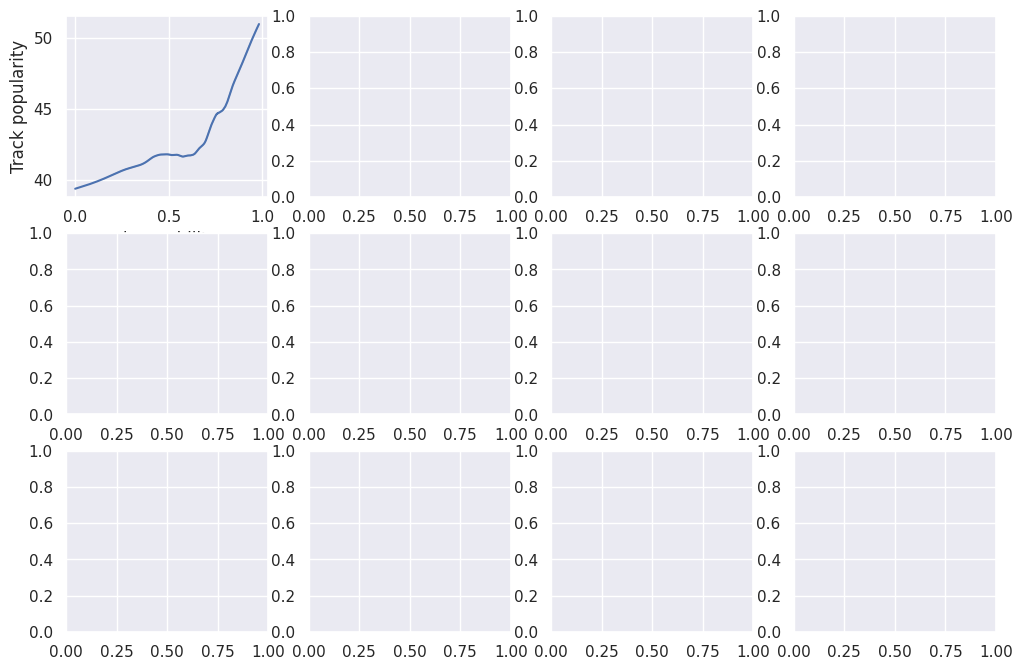

In [42]:
fig, ax = plt.subplots(ncols=4, nrows=3, figsize=(12, 8))

plot_features = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
                 'liveness', 'valence', 'tempo', 'duration_ms']

for row in range(3):
    for col in range(4):
        feature = plot_features[4 * row + col]

        # if feature != 'log_instrumentalness_rounded':
        #     sns.lineplot(data=df, x=feature, y='track_popularity', ax=ax[row, col])
        # else:
        #     sns.lineplot(data=df.query('instrumentalness > 0'), x=feature, y='track_popularity', ax=ax[row, col])

        if feature != 'instrumentalness':
            x = np.array(df[feature])
            y = np.array(df['track_popularity'])
        else:
            x = np.log10(df.query('instrumentalness > 0')['instrumentalness'])
            y = np.array(df.query('instrumentalness > 0')['track_popularity'])

        z = sm.nonparametric.lowess(y, x, frac= 1./3, it=3)

        # plt.plot(x, y, color='dodgerblue')
        # plt.plot(z[:,0], z[:,1], 'ro-')

        sns.lineplot(x=z[:, 0], y=z[:, 1], ax=ax[row, col])

        if feature == 'instrumentalness':
            feature = 'log_10 (instrumentalness)'
        ax[row, col].set(xlabel=feature, ylabel='Track popularity')

plt.tight_layout()
plt.show()

## Release date

In [43]:
df['track_album_release_date'].sort_values()

22723    1957-01-01
13408       1957-03
13461    1958-03-21
26718          1960
22715          1960
            ...    
23597    2020-01-17
29646    2020-01-17
27288    2020-01-20
1198     2020-01-20
382      2020-01-29
Name: track_album_release_date, Length: 32833, dtype: object

In [44]:
def complete_date(x):
    while len(x) < 10:
        x = x + '-01'
    return x

In [45]:
df['track_album_release_date_fmt'] = df['track_album_release_date'].apply(complete_date)
df['track_album_release_date_fmt'] = pd.to_datetime(df['track_album_release_date_fmt'])

In [46]:
date_first_album_by_artist = df.groupby('track_artist')['track_album_release_date_fmt'].min().reset_index()\
                               .rename(columns={'track_album_release_date_fmt': 'date_first_album_artist'})

df = df.merge(date_first_album_by_artist, on='track_artist')
df['is_first_album'] = df['track_album_release_date_fmt'] == df['date_first_album_artist']

In [47]:
df['is_first_album'].value_counts()

False    18826
True     14002
Name: is_first_album, dtype: int64

In [48]:
df['track_album_release_date_fmt'].dt.year.describe()

count    32828.000000
mean      2011.136834
std         11.418226
min       1957.000000
25%       2008.000000
50%       2016.000000
75%       2019.000000
max       2020.000000
Name: track_album_release_date_fmt, dtype: float64

In [50]:
df['year'] = df['track_album_release_date_fmt'].dt.year
df['month'] = df['track_album_release_date_fmt'].dt.month

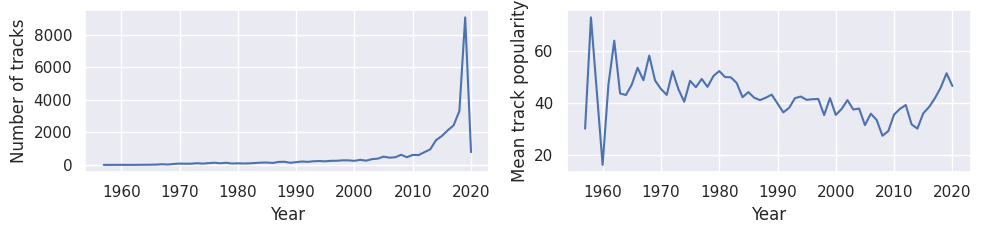

In [62]:
fig, ax = plt.subplots(ncols=2, figsize=(10, 2.5))

tracks_by_year = df.groupby('year')['track_id'].count()
mean_popularity_by_year = df.groupby('year')['track_popularity'].mean()

sns.lineplot(x=tracks_by_year.index.values, y=tracks_by_year.values, ax=ax[0])
ax[0].set(xlabel='Year', ylabel='Number of tracks')
sns.lineplot(x=mean_popularity_by_year.index.values, y=mean_popularity_by_year.values, ax=ax[1])
ax[1].set(xlabel='Year', ylabel='Mean track popularity')

plt.tight_layout()
plt.show()

In [63]:
df['after_2008'] = df['year'] > 2008
df['year_after_2008'] = df['year'] * df['after_2008']

# Inferential analysis

Algorithms:
- linear regression
- random forest regression

In [64]:
df_subgenres = pd.get_dummies(df['playlist_subgenre'])
df = pd.concat([df, df_subgenres], axis=1)

In [65]:
df_train, df_test = train_test_split(df)

## Preparation


In [66]:
popularity_mean = df_train['track_popularity'].mean()
popularity_by_artist = df_train.groupby('track_artist').agg({'track_id': 'nunique', 'track_popularity': 'mean'}).reset_index()
popularity_by_artist = popularity_by_artist.rename(columns={'track_id': 'n_track_id', 'track_popularity': 'mean_track_popularity'})

In [67]:
popularity_by_artist['mean_track_popularity_correct_1'] = ((popularity_by_artist['mean_track_popularity']
                                                           * popularity_by_artist['n_track_id']
                                                           + popularity_mean * 0.25)
                                                           / (popularity_by_artist['n_track_id'] + 0.25))

popularity_by_artist['mean_track_popularity_correct_2'] = ((popularity_by_artist['mean_track_popularity']
                                                           * popularity_by_artist['n_track_id']
                                                           + popularity_mean * 0.5)
                                                          / (popularity_by_artist['n_track_id'] + 0.5))

popularity_by_artist['mean_track_popularity_correct_3'] = ((popularity_by_artist['mean_track_popularity']
                                                           * popularity_by_artist['n_track_id']
                                                           + popularity_mean * 1)
                                                          / (popularity_by_artist['n_track_id'] + 1))

popularity_by_artist['mean_track_popularity_correct_4'] = ((popularity_by_artist['mean_track_popularity']
                                                           * popularity_by_artist['n_track_id']
                                                           + popularity_mean * 2)
                                                          / (popularity_by_artist['n_track_id'] + 2))

popularity_by_artist['mean_track_popularity_correct_5'] = ((popularity_by_artist['mean_track_popularity']
                                                           * popularity_by_artist['n_track_id']
                                                           + popularity_mean * 4)
                                                          / (popularity_by_artist['n_track_id'] + 4))

In [68]:
df_train = df_train.merge(popularity_by_artist, how='left', on='track_artist')
df_test = df_test.merge(popularity_by_artist, how='left', on='track_artist')

df_test['mean_track_popularity_correct_1'] = df_test['mean_track_popularity_correct_1'].fillna(popularity_mean)
df_test['mean_track_popularity_correct_2'] = df_test['mean_track_popularity_correct_2'].fillna(popularity_mean)
df_test['mean_track_popularity_correct_3'] = df_test['mean_track_popularity_correct_3'].fillna(popularity_mean)
df_test['mean_track_popularity_correct_4'] = df_test['mean_track_popularity_correct_4'].fillna(popularity_mean)
df_test['mean_track_popularity_correct_5'] = df_test['mean_track_popularity_correct_5'].fillna(popularity_mean)

In [69]:
df_test_track_popularity = ~df_test['mean_track_popularity_correct_1'].isna()

r2_1 = r2_score(df_test.loc[df_test_track_popularity, 'track_popularity'],
                df_test.loc[df_test_track_popularity, 'mean_track_popularity_correct_1'])
r2_2 = r2_score(df_test.loc[df_test_track_popularity, 'track_popularity'],
                df_test.loc[df_test_track_popularity, 'mean_track_popularity_correct_2'])
r2_3 = r2_score(df_test.loc[df_test_track_popularity, 'track_popularity'],
                df_test.loc[df_test_track_popularity, 'mean_track_popularity_correct_3'])
r2_4 = r2_score(df_test.loc[df_test_track_popularity, 'track_popularity'],
                df_test.loc[df_test_track_popularity, 'mean_track_popularity_correct_4'])
r2_5 = r2_score(df_test.loc[df_test_track_popularity, 'track_popularity'],
                df_test.loc[df_test_track_popularity, 'mean_track_popularity_correct_5'])

print(f'R2 score for k = 0.25: {r2_1}')
print(f'R2 score for k = 0.5: {r2_2}')
print(f'R2 score for k = 1: {r2_3}')
print(f'R2 score for k = 2: {r2_4}')
print(f'R2 score for k = 4: {r2_5}')

R2 score for k = 0.25: 0.24952274460134538
R2 score for k = 0.5: 0.25808305162872425
R2 score for k = 1: 0.26183079982737123
R2 score for k = 2: 0.25430208971346735
R2 score for k = 4: 0.23226337833249


## Random forest regression

In [70]:
features = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
            'liveness', 'valence', 'tempo', 'duration_ms', 'is_first_album', 'year', 'album rock', 'big room',
            'classic rock', 'dance pop', 'electro house', 'electropop', 'gangster rap', 'hard rock', 'hip hop', 'hip pop',
            'indie poptimism', 'latin hip hop', 'latin pop', 'neo soul', 'new jack swing', 'permanent wave', 'pop edm',
            'post-teen pop', 'progressive electro house', 'reggaeton', 'southern hip hop', 'trap', 'tropical',
            'urban contemporary', 'mean_track_popularity_correct_3']

X_train = df_train[features]
y_train = df_train['track_popularity']

In [71]:
rf = RandomForestRegressor()

rf.fit(X_train, y_train)

RandomForestRegressor()

In [72]:
X_test = df_test[features]
y_test = df_test['track_popularity']

In [73]:
y_pred = rf.predict(X_test)

error = y_pred - y_test

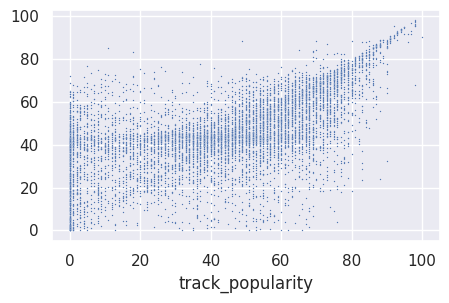

In [74]:
fig, ax = plt.subplots(figsize=(5, 3))

sns.scatterplot(x=y_test, y=y_pred, s=1, ax=ax)

plt.show()

<Axes: ylabel='Frequency'>

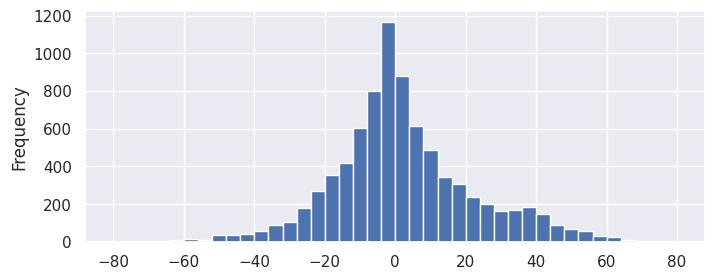

In [75]:
error.plot(kind='hist', bins=range(-80, 81, 4), figsize=(8, 3))

## Linear Regression